In [1]:
import matplotlib.pyplot as plt
from keras import Input, Sequential
from keras.src.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.src.layers import LSTM, Dense
from keras.src.utils import plot_model
from plot_keras_history import plot_history

from load_data.generate_data import prepare_train_val_test

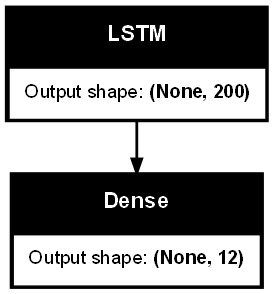

In [2]:
n_classes = 12
segment_size = 50
batch_size = 50

train, val, test, train_steps, val_steps, test_steps, n_features = (
    prepare_train_val_test(segment_size=segment_size, batch_size=batch_size, n_shifts=3)
)

model = Sequential()
model.add(Input(shape=(segment_size, n_features)))
model.add(LSTM(200, activation="tanh"))
model.add(Dense(n_classes, activation="softmax"))

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

plot_model(model, show_shapes=True, show_layer_names=False, expand_nested=True, dpi=100)

In [3]:
early_stopping = EarlyStopping(
    monitor="val_accuracy", patience=2, restore_best_weights=True, min_delta=0.01
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss", factor=0.1, patience=1, min_lr=0.0001, cooldown=1
)

history = model.fit(
    train,
    validation_data=val,
    epochs=1,
    steps_per_epoch=train_steps,
    validation_steps=val_steps,
    callbacks=[early_stopping, reduce_lr],
)

320/320 ━━━━━━━━━━━━━━━━━━━━ 59s 179ms/step - accuracy: 0.5000 - loss: 1.5332 - val_accuracy: 0.8620 - val_loss: 0.4542 - learning_rate: 0.0010


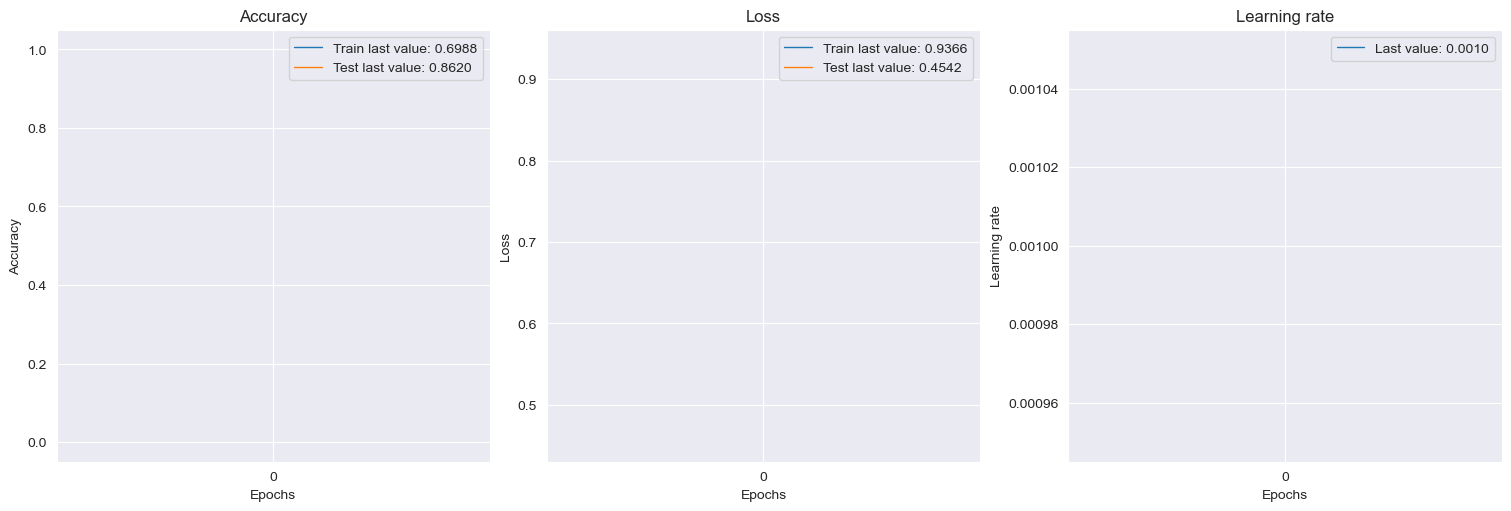

In [4]:
plt.show(plot_history(history))

In [6]:
model.evaluate(test, steps=test_steps)

39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - accuracy: 0.9243 - loss: 0.2467


[0.3027659058570862, 0.8965517282485962]